In [1]:
import pandas as pd
import numpy as np

In [2]:
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('6-world_data_full_apply.csv', index_col=0)

In [7]:
df

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912.050,343.0,17.88,58.0,Caracas,164.175,NaN,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,NaN,59.7,NaN,73.3,8.80,NaN,6.423750,-66.589730,South America
191,Vietnam,314.0,VN,39.3,331.210,522.0,16.75,84.0,Hanoi,192.668,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,NaN,77.4,19.1,37.6,2.01,NaN,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527.968,40.0,30.45,967.0,Sanaa,10.609,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,NaN,38.0,NaN,26.6,12.91,NaN,15.552727,48.516388,Asia
193,Zambia,25.0,ZM,32.1,752.618,16.0,36.19,260.0,Lusaka,5.141,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,NaN,74.6,16.2,15.6,11.43,NaN,-13.133897,27.849332,Africa


# Ejercicios gestión de nulos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               195 non-null    object 
 1   density                               195 non-null    float64
 2   abbreviation                          188 non-null    object 
 3   agricultural_land                     188 non-null    float64
 4   land_area                             165 non-null    float64
 5   armed_forces_size                     166 non-null    float64
 6   birth_rate                            189 non-null    float64
 7   calling_code                          194 non-null    float64
 8   capital/major_city                    192 non-null    object 
 9   co2-emissions                         183 non-null    float64
 10  cpi                                   175 non-null    float64
 11  cpi_change              

In [8]:
# 1. Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.
nulos_por_columna = df.isnull().sum()

In [9]:
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
columnas_con_nulos

abbreviation                              7
agricultural_land                         7
land_area                                30
armed_forces_size                        29
birth_rate                                6
calling_code                              1
capital/major_city                        3
co2-emissions                            12
cpi                                      20
cpi_change                               16
currency-code                            15
fertility_rate                            7
forested_area                             7
gasoline_price                           20
gdp                                       2
gross_primary_education_enrollment        7
gross_tertiary_education_enrollment      12
infant_mortality                          6
largest_city                              6
life_expectancy                           8
maternal_mortality_ratio                 14
minimum_wage                             45
official_language               

In [ ]:
# 2. Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar 
# los valores nulos en cada una de las columnas identificadas en el paso anterior.

- Columnas con pocos valores nulos (<10)
- Columnas con nulos moderados (10-30)
- Columnas con muchos nulos (>30)

In [ ]:
# 3. Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.

In [12]:
# 1. Imputar con la moda
cols_mode = ['abbreviation', 'calling_code', 'capital/major_city', 'currency-code', 'continent']
for col in cols_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Anita\AppData\Local\Temp\ipykernel_5072\2709683146.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
# 2. Imputar con la mediana
cols_median = ['agricultural_land', 'birth_rate', 'fertility_rate', 'life_expectancy']
df[cols_median] = df[cols_median].fillna(df[cols_median].median())

In [14]:
# 3. Usar KNN Imputer para columnas moderadas
cols_knn = ['land_area', 'armed_forces_size', 'gross_tertiary_education_enrollment']
imputer = KNNImputer(n_neighbors=5)
df[cols_knn] = imputer.fit_transform(df[cols_knn])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
# 4. Regresión para predecir valores de 'co2-emissions'
# Eliminar filas donde 'gdp' sea NaN antes de la predicción
df_missing = df[df['co2-emissions'].isnull() & df['gdp'].notnull()]

# Predecir solo para las filas donde 'gdp' no es NaN
df.loc[df['co2-emissions'].isnull() & df['gdp'].notnull(), 'co2-emissions'] = model.predict(df_missing[['gdp']])


In [19]:
from sklearn.impute import SimpleImputer

In [24]:
# Imputar valores nulos en 'gdp' usando la mediana
imputer = SimpleImputer(strategy='median')
df['gdp'] = imputer.fit_transform(df[['gdp']])

In [25]:
# Entrenar el modelo usando las filas que no tienen valores nulos en 'co2-emissions'
df_train = df.dropna(subset=['co2-emissions'])
X_train = df_train[['gdp']]
y_train = df_train['co2-emissions']

In [21]:
# Dividir los datos en conjuntos de entrenamiento (X_train, y_train)
df_train = df.dropna(subset=['co2-emissions'])
X_train = df_train[['gdp']]
y_train = df_train['co2-emissions']

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
# Seleccionar las filas donde 'co2-emissions' es nulo para la predicción
df_missing = df[df['co2-emissions'].isnull()]

# Asegúrate de que 'gdp' en esas filas no tenga valores nulos antes de predecir
if not df_missing['gdp'].isnull().any():
    # Realizar la predicción
    df.loc[df['co2-emissions'].isnull(), 'co2-emissions'] = model.predict(df_missing[['gdp']])
else:
    print("Error: Hay valores nulos en 'gdp' que deben ser tratados antes de predecir.")


In [33]:
df['cpi'].fillna(df['cpi'].median(), inplace=True)
df['cpi_change'].fillna(df['cpi_change'].median(), inplace=True)
df['forested_area'].fillna(df['forested_area'].median(), inplace=True)
df['gross_primary_education_enrollment'].fillna(df['gross_primary_education_enrollment'].median(), inplace=True)
df['infant_mortality'].fillna(df['infant_mortality'].median(), inplace=True)


C:\Users\Anita\AppData\Local\Temp\ipykernel_5072\2644213226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cpi'].fillna(df['cpi'].median(), inplace=True)
C:\Users\Anita\AppData\Local\Temp\ipykernel_5072\2644213226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [34]:
df['maternal_mortality_ratio'].fillna(df['maternal_mortality_ratio'].median(), inplace=True)
df['minimum_wage'].fillna(df['minimum_wage'].median(), inplace=True)
df['urban_population'].fillna(df['urban_population'].median(), inplace=True)


C:\Users\Anita\AppData\Local\Temp\ipykernel_5072\3536954862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['maternal_mortality_ratio'].fillna(df['maternal_mortality_ratio'].median(), inplace=True)
C:\Users\Anita\AppData\Local\Temp\ipykernel_5072\3536954862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [40]:
df['gasoline_price'].fillna(df['gasoline_price'].median(), inplace=True)


C:\Users\Anita\AppData\Local\Temp\ipykernel_5072\2564013992.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gasoline_price'].fillna(df['gasoline_price'].median(), inplace=True)


In [35]:
df['official_language'].fillna('Desconocido', inplace=True)


C:\Users\Anita\AppData\Local\Temp\ipykernel_5072\499332273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['official_language'].fillna('Desconocido', inplace=True)


In [36]:
df['largest_city'].fillna(df['largest_city'].mode()[0], inplace=True)


C:\Users\Anita\AppData\Local\Temp\ipykernel_5072\3231779131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['largest_city'].fillna(df['largest_city'].mode()[0], inplace=True)


In [37]:
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)


C:\Users\Anita\AppData\Local\Temp\ipykernel_5072\3317199528.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['latitude'].fillna(df['latitude'].mean(), inplace=True)
C:\Users\Anita\AppData\Local\Temp\ipykernel_5072\3317199528.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [41]:
df.isnull().sum()

country                                   0
density                                   0
abbreviation                              0
agricultural_land                         0
land_area                                 0
armed_forces_size                         0
birth_rate                                0
calling_code                              0
capital/major_city                        0
co2-emissions                             0
cpi                                       0
cpi_change                                0
currency-code                             0
fertility_rate                            0
forested_area                             0
gasoline_price                            0
gdp                                       0
gross_primary_education_enrollment        0
gross_tertiary_education_enrollment       0
infant_mortality                          0
largest_city                              0
life_expectancy                           0
maternal_mortality_ratio        

In [ ]:
# 4. Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, 
# cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.

- Para las columnas con pocos valores nulos es recomendable usar la mediada y más en las columnas que se encuentran correlacionadas como por ejemplo 'gross_primary_education_enrollment' y 'gross_tertiary_education_enrollment.
- En otros casos con pocos valores nulos se puede usar la función 'mode()' para poner el valor más frecuente o asignar un valor como 'desconocido'.
- Para columnas con muchos valores nulos se puede considerar la mediana o un modelo predictivo si existiensen variables económicas relevantes.


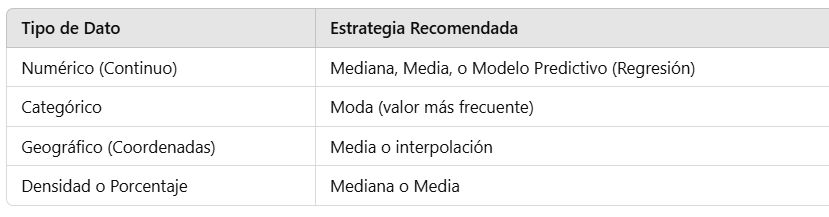